### 逻辑回归解决多分类问题

通常逻辑回归只能解决二分类问题，通过对它进行改造，可以让它解决多分类问题。  
- OvR  
    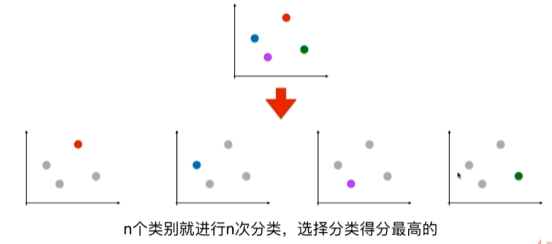
    从某一点出发，将其他的点看成异类，叫做others。从而改造成二分类任务
- OvO
    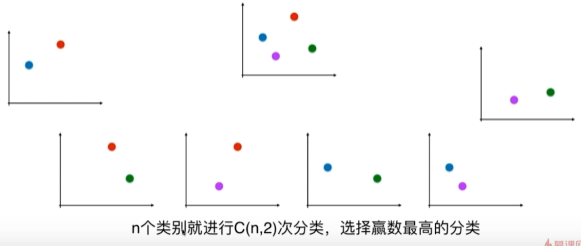
    一次选择2个点，对此进行二分类任务。判断新来的点是属于哪一个类别。

### OvR和OvO

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2] # 为了数据可视化，使用两个特征就行
y = iris.target

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [3]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression() # 默认使用OvR的多分类策略
log_reg.fit(X_train, y_train)

LogisticRegression()

In [4]:
log_reg.score(X_test, y_test) # 分类准确度

0.7894736842105263

In [5]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

<ipython-input-5-0f21d17bf4ab>:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


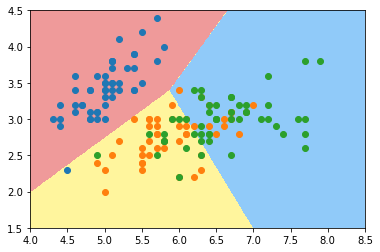

In [6]:
plot_decision_boundary(log_reg, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

In [7]:
# 使用OvO的多分类策略
log_reg2 = LogisticRegression(multi_class="multinomial", solver="newton-cg")
log_reg2.fit(X_train, y_train)
log_reg2.score(X_test, y_test) # 分类准确度得到了提高，但是时间消耗会比OvR更久

0.7894736842105263

<ipython-input-5-0f21d17bf4ab>:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


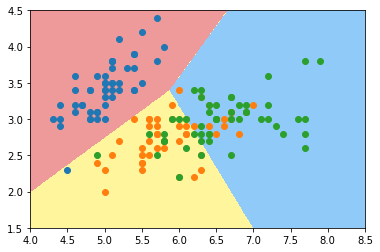

In [8]:
plot_decision_boundary(log_reg2, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

In [9]:
# 使用所有特征
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [10]:
log_reg = LogisticRegression() # 使用OvR
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

1.0

In [11]:
log_reg2 = LogisticRegression(multi_class="multinomial", solver="newton-cg") # 使用OvO
log_reg2.fit(X_train, y_train)
log_reg2.score(X_test, y_test)

1.0

### OvO类和OvR类 

In [12]:
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(log_reg) # 传入二分类器，便可以对该二分类器改造为OvR多分类
ovr.fit(X_train, y_train)
ovr.score(X_test, y_test)

0.9736842105263158

In [13]:
from sklearn.multiclass import OneVsOneClassifier

ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)
ovo.score(X_test, y_test)  # 可见OvO对比OvR的分类准确度更高

1.0